# Home Task 

Use diabetes dataset (`sklearn.datasets.load_diabetes`) and apply
 - Ridge 
 - Lasso
 - Polynomial

In [117]:
# Install libraries from requirements.txt
%pip install -r "C:\Users\DELL\Documents\GitHub\Data_Science\requirements.txt"

Note: you may need to restart the kernel to use updated packages.


In [118]:
# Import libraries
import numpy as np

import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import Ridge, Lasso, LinearRegression

from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.pipeline import make_pipeline

### Load dataset

In [119]:
# Load the dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [120]:
X = diabetes.data  # Matrix of features (n_samples x n_features)
y = diabetes.target  # Vector of target values (n_samples,)

print(diabetes.DESCR)  # detailed description of dataset

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

The dataset contains:

10 input features - numerical parameters that can influence the risk of diabetes.

1 target variable - the level of diabetes progression in a year.

The features in this dataset are already normalized (brought to the same scale), so additional scaling is not always necessary.

📌 What are the signs?

age - patient's age

sex - sex (encoded numerically)

bmi - body mass index (Body Mass Index)

bp - average blood pressure

s1-s6 - six serum levels

These variables help to predict the level of diabetes in a year.

### Data processing

#### Spliting into train and test set

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Scaling

In [122]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Transform ONLY test data

<font color = green >

### Linear Regression
</font>

In [123]:
# Create model linear regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [124]:
# Prediction
y_pred = lin_reg.predict(X_test)

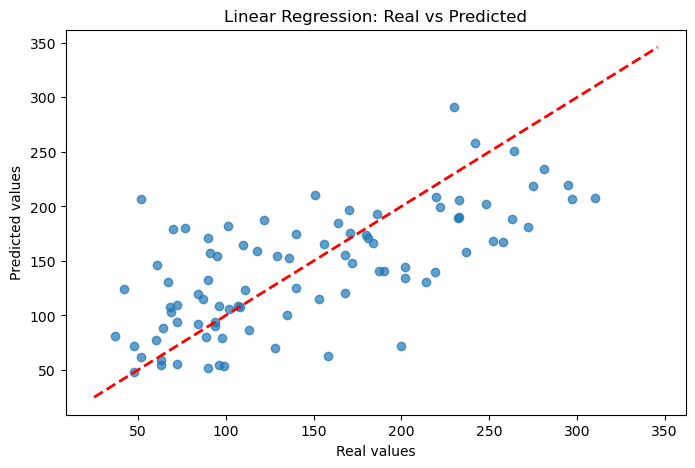

In [125]:
# Visualization: real vs predicted values
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Real values")
plt.ylabel("Predicted values")
plt.title("Linear Regression: Real vs Predicted")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--", lw=2)  # ideal line
plt.show()

#### Mean Squared Error

In [126]:
# Show the error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean square error (MSE): {mse:.2f}")

Mean square error (MSE): 2900.19


<font color = green >

### Ridge
</font>

#### Cross-validation (GridSearchCV)

In [127]:
# Set the range of alpha values
alphas = np.logspace(-3, 3, 50)

In [128]:
# Customize GridSearchCV to find the best alpha
ridge_cv = GridSearchCV(Ridge(), param_grid={"alpha": alphas}, scoring="neg_mean_squared_error", cv=5)
ridge_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-03, 1.32571137e-03, 1.75751062e-03, 2.32995181e-03,
       3.08884360e-03, 4.09491506e-03, 5.42867544e-03, 7.19685673e-03,
       9.54095476e-03, 1.26485522e-02, 1.67683294e-02, 2.22299648e-02,
       2.94705170e-02, 3.90693994e-02, 5.17947468e-02, 6.86648845e-02,
       9.10298178e-02, 1.20679264e-01, 1.59985872e-01, 2....
       2.68269580e+00, 3.55648031e+00, 4.71486636e+00, 6.25055193e+00,
       8.28642773e+00, 1.09854114e+01, 1.45634848e+01, 1.93069773e+01,
       2.55954792e+01, 3.39322177e+01, 4.49843267e+01, 5.96362332e+01,
       7.90604321e+01, 1.04811313e+02, 1.38949549e+02, 1.84206997e+02,
       2.44205309e+02, 3.23745754e+02, 4.29193426e+02, 5.68986603e+02,
       7.54312006e+02, 1.00000000e+03])},
             scoring='neg_mean_squared_error')

In [129]:
# Print the best alpha value
best_alpha_ridge = ridge_cv.best_params_["alpha"]
print(f"The dest alpha for Ridge: {best_alpha_ridge:.5f}")

The dest alpha for Ridge: 0.06866


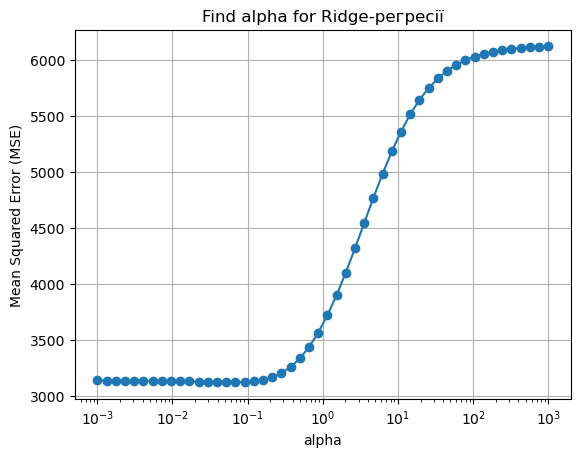

In [130]:
# Visualization 
plt.plot(alphas, -ridge_cv.cv_results_["mean_test_score"], marker="o")
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Find alpha for Ridge-регресії")
plt.grid()
plt.show()


In [131]:
ridge_reg = Ridge(best_alpha_ridge) # The higher the alpha, the more regularization

# Fit the model
ridge_reg.fit(X_train, y_train)

# Prediction
y_pred_train_ridge_reg = ridge_reg.predict(X_train)
y_pred_test_ridge_reg = ridge_reg.predict(X_test)

# Accuracy Score
print('Training accuracy : {}\n'.format(round(r2_score(y_train, y_pred_train_ridge_reg), 5)))
print('Testing accuracy : {}'.format(round(r2_score(y_test, y_pred_test_ridge_reg), 5)))

Training accuracy : 0.52228

Testing accuracy : 0.45987


#### Visualization

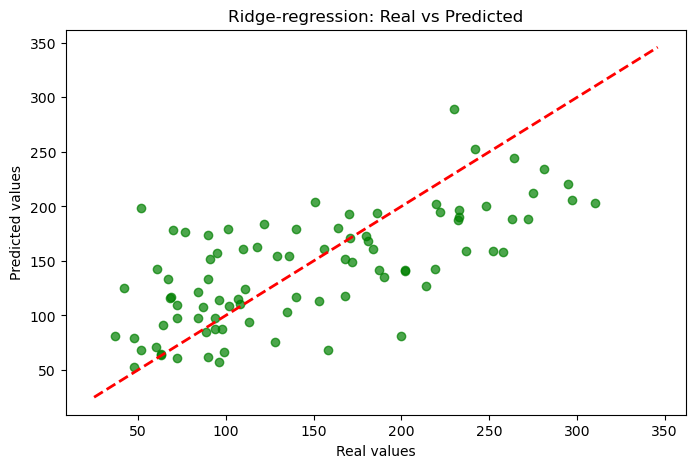

In [132]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_test_ridge_reg, alpha=0.7, color="green")
plt.xlabel("Real values")
plt.ylabel("Predicted values")
plt.title("Ridge-regression: Real vs Predicted")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--", lw=2)
plt.show()

#### Mean Squared Error 

In [133]:
mse_ridge = mean_squared_error(y_test, y_pred_test_ridge_reg)
print(f"Mean square error (MSE) Ridge: {mse_ridge:.2f}")

Mean square error (MSE) Ridge: 2861.72


<font color = green >

### Lasso
</font>

#### Cross-validation (GridSearchCV)

In [134]:
# Customize GridSearchCV to find the best alpha
lasso_cv = GridSearchCV(Lasso(), param_grid={"alpha": alphas}, scoring="neg_mean_squared_error", cv=5)
lasso_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-03, 1.32571137e-03, 1.75751062e-03, 2.32995181e-03,
       3.08884360e-03, 4.09491506e-03, 5.42867544e-03, 7.19685673e-03,
       9.54095476e-03, 1.26485522e-02, 1.67683294e-02, 2.22299648e-02,
       2.94705170e-02, 3.90693994e-02, 5.17947468e-02, 6.86648845e-02,
       9.10298178e-02, 1.20679264e-01, 1.59985872e-01, 2....
       2.68269580e+00, 3.55648031e+00, 4.71486636e+00, 6.25055193e+00,
       8.28642773e+00, 1.09854114e+01, 1.45634848e+01, 1.93069773e+01,
       2.55954792e+01, 3.39322177e+01, 4.49843267e+01, 5.96362332e+01,
       7.90604321e+01, 1.04811313e+02, 1.38949549e+02, 1.84206997e+02,
       2.44205309e+02, 3.23745754e+02, 4.29193426e+02, 5.68986603e+02,
       7.54312006e+02, 1.00000000e+03])},
             scoring='neg_mean_squared_error')

In [135]:
# Print the best alpha value
best_alpha_lasso = lasso_cv.best_params_["alpha"]
print(f"The best alpha for Lasso: {best_alpha_lasso:.5f}")

The best alpha for Lasso: 0.06866


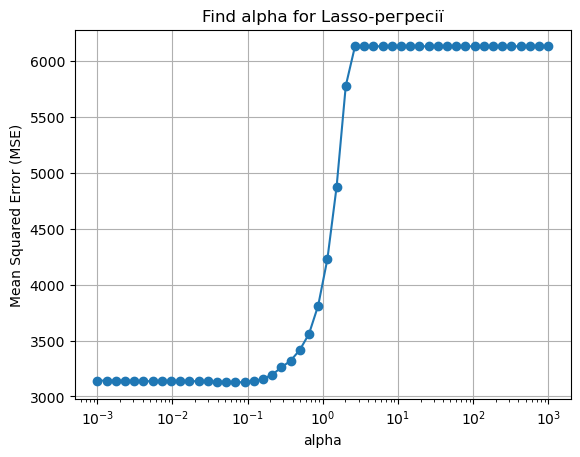

In [136]:
# Visualization
plt.plot(alphas, -lasso_cv.cv_results_["mean_test_score"], marker="o")
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Find alpha for Lasso-регресії")
plt.grid()
plt.show()

In [137]:
lasso_reg = Lasso(best_alpha_lasso) # Can nullify thr features

# Fit the model
ridge_reg.fit(X_train, y_train)

# Prediction
y_pred_train_lasso_reg = ridge_reg.predict(X_train)
y_pred_test_lasso_reg = ridge_reg.predict(X_test)

# Accuracy Score
print('Training accuracy : {}\n'.format(round(r2_score(y_train, y_pred_train_lasso_reg), 5)))
print('Testing accuracy : {}'.format(round(r2_score(y_test, y_pred_test_lasso_reg), 5)))

Training accuracy : 0.52228

Testing accuracy : 0.45987


#### Visualization

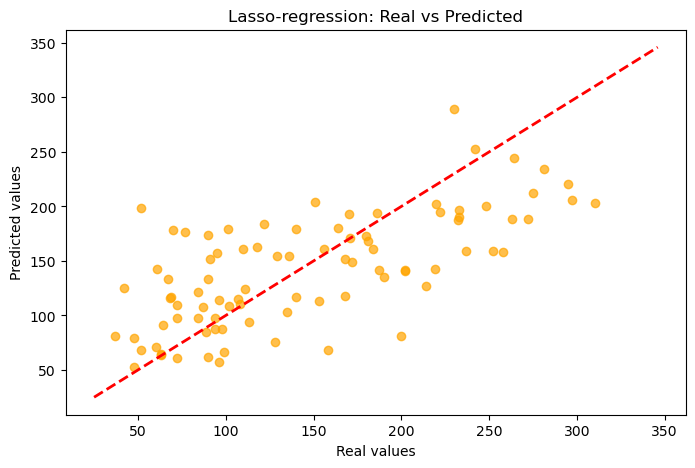

In [138]:
# Visualization
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_test_lasso_reg, alpha=0.7, color="orange")
plt.xlabel("Real values")
plt.ylabel("Predicted values")
plt.title("Lasso-regression: Real vs Predicted")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--", lw=2)
plt.show()

#### Mean Squared Error 

In [139]:
mse_lasso = mean_squared_error(y_test, y_pred_test_lasso_reg)
print(f"Mean square error (MSE) Lasso: {mse_lasso:.2f}")

Mean square error (MSE) Lasso: 2861.72


<font color = green >

### Polynomial + Linear regression
</font>

#### Creating a polynomial features

In [140]:
# Creating a polynomial features (quadratic)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

#### Training linear regression on polynomial features

In [141]:
# Training linear regression on polynomial features
poly_lin_reg = LinearRegression().fit(X_train_poly, y_train)

#### Evaluating the quality of the model

In [142]:
# Evaluating the quality of the model
train_score = poly_lin_reg.score(X_train_poly, y_train)
test_score = poly_lin_reg.score(X_test_poly, y_test)

print(f'Polynomial + Linear Regression:')
print(f'R2 train score = {train_score:.4f}')
print(f'R2 test score = {test_score:.4f}')

Polynomial + Linear Regression:
R2 train score = 0.6062
R2 test score = 0.4156


#### Visualization

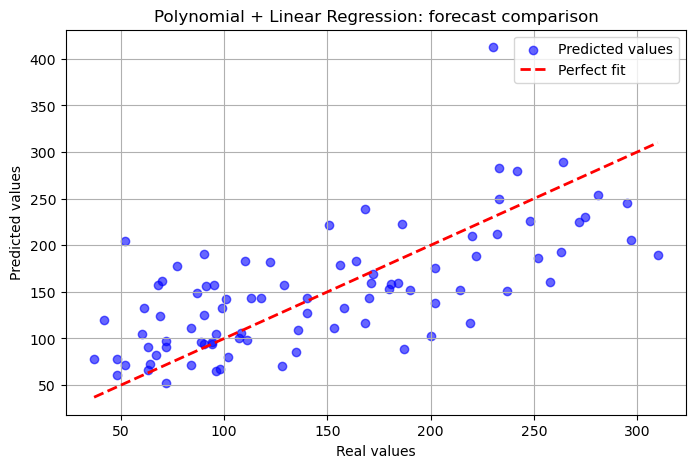

In [143]:
plt.figure(figsize=(8, 5))

plt.scatter(y_test, poly_lin_reg.predict(X_test_poly), alpha=0.6, color="blue", label="Predicted values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2, label="Perfect fit")

plt.xlabel("Real values")
plt.ylabel("Predicted values")
plt.title("Polynomial + Linear Regression: forecast comparison")
plt.legend()
plt.grid()
plt.show()


<font color = green >

### Polynomial + Ridge
</font>

#### Creating a pipeline

In [144]:
# Creating a pipeline: Polynomial features + Ridge regression
poly_ridge = make_pipeline(PolynomialFeatures(degree=2), Ridge(best_alpha_ridge))
poly_ridge.fit(X_train, y_train)
y_pred_poly_ridge = poly_ridge.predict(X_test)

#### Visualization

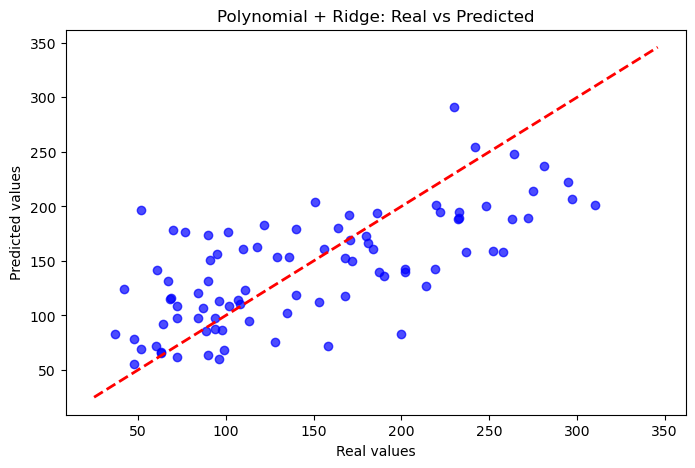

In [145]:
# Visualization
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_poly_ridge, alpha=0.7, color="blue")
plt.xlabel("Real values")
plt.ylabel("Predicted values")
plt.title("Polynomial + Ridge: Real vs Predicted")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--", lw=2)
plt.show()

#### Mean Squared Error 

In [146]:
mse_poly_ridge = mean_squared_error(y_test, y_pred_poly_ridge)
print(f"Mean Squared Error (MSE) Polynomial + Ridge: {mse_poly_ridge:.2f}")

Mean Squared Error (MSE) Polynomial + Ridge: 2824.25


<font color = green >

### Polynomial + Lasso
</font>

#### Creating a pipeline

In [147]:
poly_lasso = make_pipeline(PolynomialFeatures(degree=2), Lasso(best_alpha_lasso))
poly_lasso.fit(X_train, y_train)
y_pred_poly_lasso = poly_lasso.predict(X_test)

#### Visualization

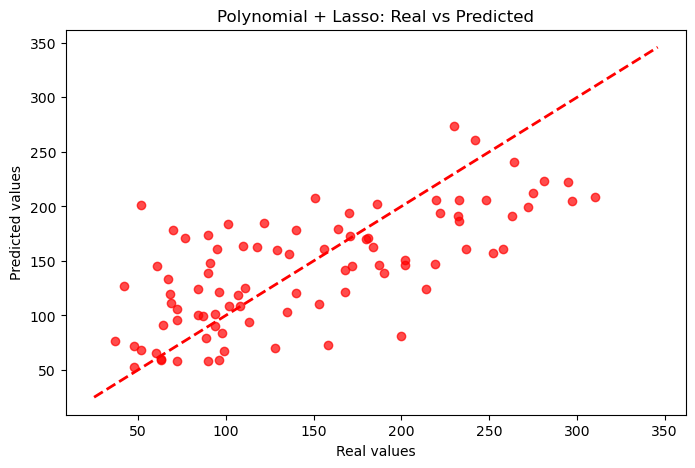

In [148]:
# Visualization
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_poly_lasso, alpha=0.7, color="red")
plt.xlabel("Real values")
plt.ylabel("Predicted values")
plt.title("Polynomial + Lasso: Real vs Predicted")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--", lw=2)
plt.show()

#### Mean Squared Error 

In [149]:
mse_poly_lasso = mean_squared_error(y_test, y_pred_poly_lasso)
print(f"Mean Squared Error  (MSE) Polynomial + Lasso: {mse_poly_lasso:.2f}")

Mean Squared Error  (MSE) Polynomial + Lasso: 2802.70


<font color = green >

### Normal Equation
</font>

In [150]:
class NormalEquation:
    def fit(self, X, y):
        """Finds optimal model weights"""
        m, n = X.shape

        # Add a column of units (for the free term)
        X_ext = np.hstack((np.ones((m, 1)), X))  
        
        # Apply the normal equation formula
        params = np.linalg.inv(X_ext.T @ X_ext) @ X_ext.T @ y  

        # Keeping the coefficients
        self.intercept_ = params[0]
        self.coef_ = params[1:].reshape(1, -1)

    def predict(self, X):
        """Makes predictions"""
        X_ext = np.hstack((np.ones((X.shape[0], 1)), X))
        return X_ext @ np.vstack((self.intercept_, self.coef_.T))

    def score(self, X, y):
        """Calculates the coefficient of setermination R2"""
        return r2_score(y, self.predict(X))

# Usage
norm_eq = NormalEquation()
norm_eq.fit(X_train, y_train)

print(f'Normal Equation:')
print(f'b = {norm_eq.intercept_:.4f}')
print(f'w = {norm_eq.coef_}')
print(f'R2 train score = {norm_eq.score(X_train, y_train):.4f}')
print(f'R2 test score = {norm_eq.score(X_test, y_test):.4f}')


Normal Equation:
b = 151.3456
w = [[  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
   518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]]
R2 train score = 0.5279
R2 test score = 0.4526


#### Visualization

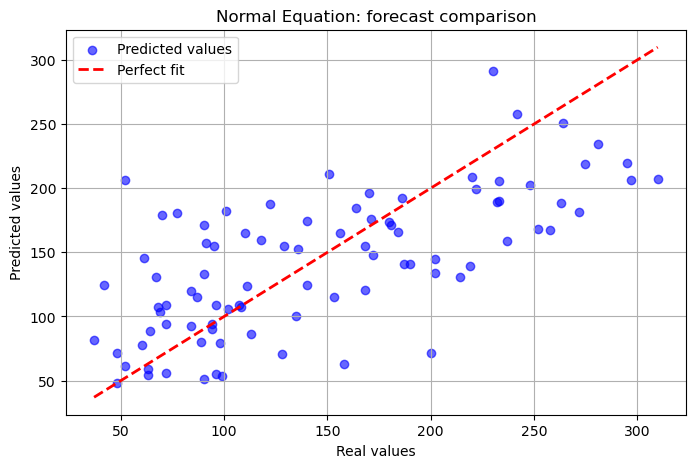

In [152]:
# Visualization 
plt.figure(figsize=(8, 5))

plt.scatter(y_test, norm_eq.predict(X_test), alpha=0.6, color="blue", label="Predicted values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2, label="Perfect fit")

plt.xlabel("Real values")
plt.ylabel("Predicted values")
plt.title("Normal Equation: forecast comparison")
plt.legend()
plt.grid()
plt.show()
